I. Towards writing clear instructions

2. Persona

In [1]:
from openai import OpenAI
import pandas as pd
df = pd.read_csv('verbs1.csv')
client = OpenAI()

def p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
                "نتا خبير فلهجة الدارجة المغربية وفالترجمة من الدارجة لنجليزية.\n" + 
                "ترجم الفعل المعطي بالدارجة المغربية لفعل انجليزي مجرد المصدر.\n" +
                "الترجمة خص يكون فيها غير جذر الفعل المترجم بلا تفسيرات."
             },
            {"role": "user", "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content
def eng_p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
             "You are an expert in Language translation from Moroccan Darija dialect to English.\n" +
             "Translate the provided Moroccan Darija dialect verb into a bare-infinitive English verb.\n" + 
             "The translation must contain only the lemma of the translated verb with no explanations."},
            {"role": "user", "content": f"{verb}"},             
            ],
        temperature=0
    )
    return completion.choices[0].message.content
def p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
                "نتا خبير فلهجة الدارجة المغربية وفالترجمة من الدارجة لنجليزية.\n" + 
                "ترجم الفعل المعطي بالدارجة المغربية لفعل انجليزي مجرد المصدر.\n" +
                "الترجمة خص يكون فيها غير جذر الفعل المترجم بلا تفسيرات.\n" +
                "الهدف  ديال هاد الترجمة هو نقراو الدقة ديال جي بي تي فالدارجة. " +
                "الجمهور المستهدف هما المتكلمين بالدارجة وانجليزية."
             },
            {"role": "user", "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content
def eng_p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {"role": "system", "content": 
             "You are an expert in Language translation from Moroccan Darija dialect to English.\n" +
             "Translate the provided Moroccan Darija dialect verb into a bare-infinitive English verb.\n" + 
             "The translation must contain only the lemma of the translated verb with no explanations.\n" +
             "Purpose of the translation is to study the accuracy of this GPT prompt on Darija. " +
             "The target audience is bilingual Darija and English speakers."
             },
            {"role": "user", "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content
df.columns

Index(['darija_ar', 'eng', 'p1_transl', 'eng_p1_transl', 'p2_transl',
       'eng_p2_transl', 'p3_transl', 'eng_p3_transl', 'p4_transl',
       'eng_p4_transl'],
      dtype='object')

In [2]:
dataset = df.copy()
columns_to_delete = [ 'p1_transl', 'eng_p1_transl', 'p2_transl',
       'eng_p2_transl',  'p4_transl',
       'eng_p4_transl']
dataset.drop(columns=columns_to_delete, inplace=True)
print(dataset.columns)
dataset.columns = ['darija_ar', 'eng', 'p1_transl', 'eng_p1_transl']
print(dataset.columns)

Index(['darija_ar', 'eng', 'p3_transl', 'eng_p3_transl'], dtype='object')
Index(['darija_ar', 'eng', 'p1_transl', 'eng_p1_transl'], dtype='object')


In [3]:
dataset['p2_transl'] = dataset['darija_ar'].apply(p2_translate_)
dataset['eng_p2_transl'] = dataset['darija_ar'].apply(eng_p2_translate_)
dataset['p3_transl'] = dataset['darija_ar'].apply(p3_translate_)
dataset['eng_p3_transl'] = dataset['darija_ar'].apply(eng_p3_translate_)

In [5]:
dataset.to_csv('verbs2.csv', index=False)


In [6]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
import pandas as pd

dataset = pd.read_csv('verbs2.csv')

eng = dataset['eng']
p1_transl = dataset['p1_transl']
eng_p1_transl = dataset['eng_p1_transl']
p2_transl = dataset['p2_transl']
eng_p2_transl = dataset['eng_p2_transl']
p3_transl = dataset['p3_transl']
eng_p3_transl = dataset['eng_p3_transl']


eng = [verb.replace(" ", "_") for verb in eng]
p1_transl = [verb.replace(" ", "_") for verb in p1_transl]
eng_p1_transl = [verb.replace(" ", "_") for verb in eng_p1_transl]
p2_transl = [verb.replace(" ", "_") for verb in p2_transl]
eng_p2_transl = [verb.replace(" ", "_") for verb in eng_p2_transl]
p3_transl = [verb.replace(" ", "_") for verb in p3_transl]
eng_p3_transl = [verb.replace(" ", "_") for verb in eng_p3_transl]



def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score

def evaluate_pairs(transl,threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results



results_p1 = evaluate_pairs(p1_transl)
results_eng_p1 = evaluate_pairs(eng_p1_transl)
results_p2 = evaluate_pairs(p2_transl)
results_eng_p2 = evaluate_pairs(eng_p2_transl)
results_p3 = evaluate_pairs(p3_transl)
results_eng_p3 = evaluate_pairs(eng_p3_transl)


dataset['similarity_p1'] = [item[2] for item in results_p1]
dataset['similarity_eng_p1'] = [item[2] for item in results_eng_p1]
dataset['similarity_p2'] = [item[2] for item in results_p2]
dataset['similarity_eng_p2'] = [item[2] for item in results_eng_p2]
dataset['similarity_p3'] = [item[2] for item in results_p3]
dataset['similarity_eng_p3'] = [item[2] for item in results_eng_p3]



p1_s = dataset['similarity_p1']
ep1_s = dataset['similarity_eng_p1']
p2_s = dataset['similarity_p2'] 
ep2_s = dataset['similarity_eng_p2'] 
p3_s = dataset['similarity_p3'] 
ep3_s = dataset['similarity_eng_p3'] 

p1= dataset['similarity_p1'].mean()
ep1= dataset['similarity_eng_p1'].mean()
p2= dataset['similarity_p2'].mean()
ep2= dataset['similarity_eng_p2'].mean()
p3= dataset['similarity_p3'].mean()
ep3= dataset['similarity_eng_p3'].mean()


print(f'Mean value of similarities in the first darija prompt is: {p1}')
print(f'Mean value of similarities in the first english prompt is: {ep1}')
print(f'Mean value of similarities in the second darija prompt is: {p2}')
print(f'Mean value of similarities in the second englsih prompt is: {ep2}')
print(f'Mean value of similarities in the third darija prompt is: {p3}')
print(f'Mean value of similarities in the third english prompt is: {ep3}')
dataset.describe()

Mean value of similarities in the first darija prompt is: 0.5859717643467645
Mean value of similarities in the first english prompt is: 0.5984392246642246
Mean value of similarities in the second darija prompt is: 0.588022557997558
Mean value of similarities in the second englsih prompt is: 0.602481684981685
Mean value of similarities in the third darija prompt is: 0.5683416056166056
Mean value of similarities in the third english prompt is: 0.5536416056166056


,similarity_p1,similarity_eng_p1,similarity_p2,similarity_eng_p2,similarity_p3,similarity_eng_p3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.585972,0.598439,0.588023,0.602482,0.568342,0.553642
std,0.377440,0.388834,0.380515,0.386036,0.392998,0.410372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.250000,0.250000,0.200000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Box(y=dataset['similarity_p1'], name='Darija first prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p1'], name='english first prompt'))
fig.add_trace(go.Box(y=dataset['similarity_p2'], name='darija second prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p2'], name='english second prompt'))
fig.add_trace(go.Box(y=dataset['similarity_p3'], name='darija third prompt'))
fig.add_trace(go.Box(y=dataset['similarity_eng_p3'], name='english third prompt'))

# Update layout
fig.update_layout(
    title='Box Plot of Similarity Scores for all the prompts.',
    yaxis_title='Similarity Score',
    xaxis_title='Prompt',
    boxmode='group'  # group the box plots together
)

# Show plot
fig.show()

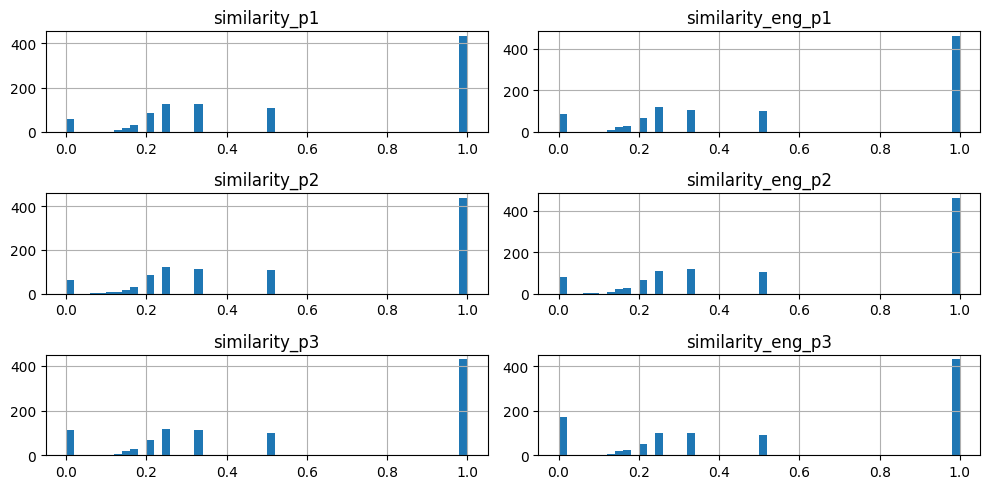

In [8]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(10,5))

plt.tight_layout()
plt.grid(True)
plt.show()

In [18]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p1'], x=dataset['similarity_p1'], name="Count of similarities in first Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p2'], x=dataset['similarity_p2'], name="Count of similarities in second Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p3'], x=dataset['similarity_p3'], name="Count of similarities in third Darija prompt"))

fig.show()

In [17]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p1'], x=dataset['similarity_eng_p1'], name="Count of similarities in first English prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p2'], x=dataset['similarity_eng_p2'], name="Count of similarities in second English prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p3'], x=dataset['similarity_eng_p3'], name="Count of similarities in third English prompt"))

fig.show()

In [11]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(p1_s, ep1_s, p2_s, ep2_s)


print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference between the prompts written in English and Darija")
else:
    print("No significant difference between the prompts written in English and Darija")

F-statistic: 0.4347107821218475
P-value: 0.7281638238584263
No significant difference between the prompts written in English and Darija


In [12]:
from scipy.stats import ttest_ind, ttest_rel


# Interpretation
def ind_t_test(groups, percentage1, percentage2):
    t_stat, p_value = ttest_ind(percentage1, percentage2)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"The difference between the two sets of path similarity percentages between {groups} is statistically significant.\n")
    else:
        print(f"The difference between the two sets of path similarity percentages between {groups} is not statistically significant.\n")

def paired_t_test(groups, percentage1, percentage2):
    t_stat, p_value = ttest_rel(percentage1, percentage2)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"The difference between the two sets of path similarity percentages between {groups} is statistically significant.\n")
    else:
        print(f"The difference between the two sets of path similarity percentages between {groups} is not statistically significant.\n")

groups1 = 'English and Darija in the first prompt'
groups2 = 'English and Darija in the second prompt'
groups3 = 'English and Darija in the third prompt'

groups4 = 'Darija first and second prompt'
groups5 = 'Darija second and third prompt'

groups6 = 'English first and second prompt'
groups7 = 'Englsih second and third prompt'

ind_t_test(groups1,p1_s,ep1_s)
ind_t_test(groups2,p2_s,ep2_s)
ind_t_test(groups3,p3_s,ep3_s)

paired_t_test(groups4,p1_s,p2_s)
paired_t_test(groups5,p2_s,p3_s)

paired_t_test(groups6,ep1_s,ep2_s)
paired_t_test(groups7,ep2_s,ep3_s)


T-statistic: -0.7275474455518097
P-value: 0.46697590523288446
The difference between the two sets of path similarity percentages between English and Darija in the first prompt is not statistically significant.

T-statistic: -0.8435382716947353
P-value: 0.3990284472707596
The difference between the two sets of path similarity percentages between English and Darija in the second prompt is not statistically significant.

T-statistic: 0.818116040752355
P-value: 0.413388485695109
The difference between the two sets of path similarity percentages between English and Darija in the third prompt is not statistically significant.

T-statistic: -0.3086970183978588
P-value: 0.7576163736289081
The difference between the two sets of path similarity percentages between Darija first and second prompt is not statistically significant.

T-statistic: 2.9050426072083826
P-value: 0.003752987083151177
The difference between the two sets of path similarity percentages between Darija second and third prompt i

In [13]:
print('filtered Darija prompt 1 of less than 0.2 similarity')
filtered_p1 = [x for x in results_p1 if x[2] < 0.2]
print(filtered_p1)
print('filtered English prompt 1 of less than 0.2 similarity')
filtered_p1 = [x for x in results_eng_p1 if x[2] < 0.2]
print(filtered_p1)


print('filtered Darija prompt 2 of less than 0.2 similarity')
filtered_p2 = [x for x in results_p2 if x[2] < 0.2]
print(filtered_p2)
print('filtered English prompt 2 of less than 0.2 similarity')
filtered_p2 = [x for x in results_eng_p2 if x[2] < 0.2]
print(filtered_p2)


print('filtered Darija prompt 3 of less than 0.2 similarity')
filtered_p3 = [x for x in results_p3 if x[2] < 0.2]
print(filtered_p3)
print('filtered English prompt  3 of less than 0.2 similarity')
filtered_p3 = [x for x in results_eng_p3 if x[2] < 0.2]
print(filtered_p3)

filtered Darija prompt 1 of less than 0.2 similarity
[('No.', 'eat', 0, False), ('شرح_=_explain', 'explain', 0, False), ('to_hear', 'hear', 0, False), ('to_do', 'swim', 0, False), ('Go', 'bargain', 0.16666666666666666, False), ('Wipe', 'clean', 0.16666666666666666, False), ('To_thank', 'greet', 0, False), ('دير', 'say', 0, False), ('Security', 'believe', 0, False), ('Thank.', 'thank', 0, False), ('Refuse', 'suppose', 0.16666666666666666, False), ('"before"', 'accept', 0, False), ('Hello', 'sit_down', 0, False), ('To_eat', 'send', 0, False), ('to_hear', 'listen', 0, False), ('Protect', 'ring', 0.16666666666666666, False), ('Tag', 'trust', 0.16666666666666666, False), ('Getting_married', 'marry', 0, False), ('Show_us', 'exercise', 0, False), ('Confess', 'recognize', 0.16666666666666666, False), ('Thank.', 'doubt', 0, False), ('Sleep', 'intent', 0, False), ('Okay', 'cook', 0.1111111111111111, False), ('Expect', 'predict', 0.14285714285714285, False), ('Lock_up', 'stop', 0.1666666666666666

similarity_eng_p2  0.000000  0.071429  0.076923  0.083333  0.125000  0.142857  \
similarity_eng_p1                                                               
0.000000                 48         0         0         0         0         1   
0.076923                  0         0         1         0         0         0   
0.083333                  0         0         0         1         0         0   
0.111111                  0         0         0         0         0         0   
0.125000                  1         0         0         0         8         0   
0.142857                  1         0         0         0         0        20   
0.166667                  3         0         0         0         0         0   
0.200000                  2         0         0         0         0         0   
0.250000                 13         0         0         0         0         0   
0.333333                  2         0         0         0         0         0   
0.500000                  3 

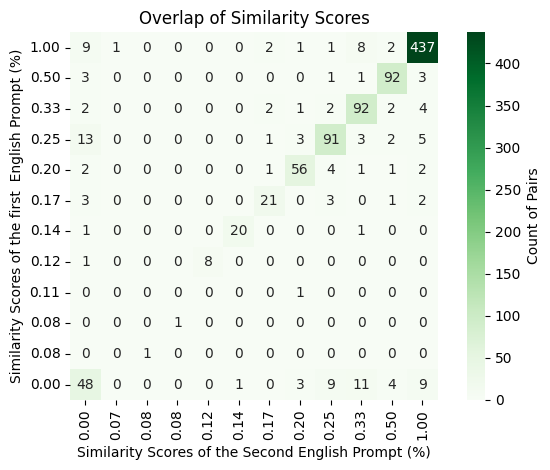

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset['triple_verbs'] = dataset['eng'] + ', ' + dataset['p1_transl'] + ', ' + dataset['eng_p1_transl']

# Add Index Column
#dataset["index"] = dataset["eng"] + "-" + dataset["translations_prompt1"]
dataset["index"] = dataset["triple_verbs"]

dataset.set_index("index", inplace=True)

# Create Pivot Table
piv = pd.pivot_table(dataset, values="triple_verbs", index=["similarity_eng_p1"], columns=["similarity_eng_p2"], aggfunc='count', fill_value=0)
print(piv)


# Format similarity scores to two decimal places
piv.index = piv.index.map(lambda x: f'{x:.2f}')
piv.columns = piv.columns.map(lambda x: f'{x:.2f}')


ax = sns.heatmap(piv, square=True, annot=True, fmt="d", cbar_kws={'label': 'Count of Pairs'}, cmap="Greens")
plt.xlabel('Similarity Scores of the Second English Prompt (%)')
plt.ylabel('Similarity Scores of the first  English Prompt (%)')
plt.title('Overlap of Similarity Scores')
plt.gca().invert_yaxis()  # Reverse y-axis
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()


similarity_p2  0.000000  0.071429  0.076923  0.083333  0.100000  0.111111  \
similarity_p1                                                               
0.000000             31         0         0         0         0         1   
0.076923              0         0         1         0         0         0   
0.083333              0         0         0         1         0         0   
0.111111              0         0         0         0         0         2   
0.125000              1         0         0         0         0         1   
0.142857              1         0         0         0         0         0   
0.166667              1         0         0         0         2         0   
0.200000              8         0         0         0         0         0   
0.250000              6         0         0         0         0         0   
0.333333              7         1         0         0         0         0   
0.500000              1         0         0         0         0         0   

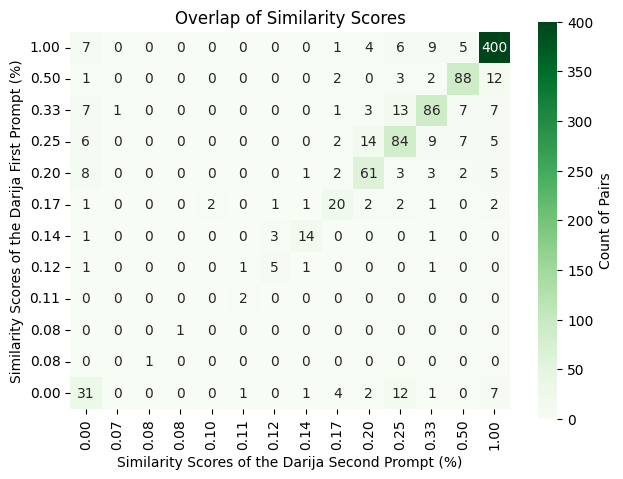

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset['triple_verbs'] = dataset['eng'] + ', ' + dataset['p1_transl'] + ', ' + dataset['p2_transl']

# Add Index Column
#dataset["index"] = dataset["eng"] + "-" + dataset["translations_prompt1"]
dataset["index"] = dataset["triple_verbs"]

dataset.set_index("index", inplace=True)

# Create Pivot Table
piv = pd.pivot_table(dataset, values="triple_verbs", index=["similarity_p1"], columns=["similarity_p2"], aggfunc='count', fill_value=0)
print(piv)


# Format similarity scores to two decimal places
piv.index = piv.index.map(lambda x: f'{x:.2f}')
piv.columns = piv.columns.map(lambda x: f'{x:.2f}')


ax = sns.heatmap(piv, square=True, annot=True, fmt="d", cbar_kws={'label': 'Count of Pairs'}, cmap="Greens")
plt.xlabel('Similarity Scores of the Darija Second Prompt (%)')
plt.ylabel('Similarity Scores of the Darija First Prompt (%)')
plt.title('Overlap of Similarity Scores')
plt.gca().invert_yaxis()  # Reverse y-axis
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()


In [16]:
p1_zero_count = (dataset['similarity_p1'] == 0).sum()
print(f"Number of zero values in similarity_p1: {p1_zero_count}")
p2_zero_count = (dataset['similarity_p2'] == 0).sum()
print(f"Number of zero values in similarity_p2: {p2_zero_count}")
p3_zero_count = (dataset['similarity_p3'] == 0).sum()
print(f"Number of zero values in similarity_p3: {p3_zero_count}")

eng_p1_zero_count = (dataset['similarity_eng_p1'] == 0).sum()
print(f"Number of zero values in similarity_eng_p1: {eng_p1_zero_count}")
eng_p2_zero_count = (dataset['similarity_eng_p2'] == 0).sum()
print(f"Number of zero values in similarity_eng_p2: {eng_p2_zero_count}")
eng_p3_zero_count = (dataset['similarity_p3'] == 0).sum()
print(f"Number of zero values in similarity_p3: {eng_p3_zero_count}")



Number of zero values in similarity_p1: 59
Number of zero values in similarity_p2: 63
Number of zero values in similarity_p3: 112
Number of zero values in similarity_eng_p1: 85
Number of zero values in similarity_eng_p2: 82
Number of zero values in similarity_p3: 112


#### Example of persona:

SYSTEM:
When I ask for help to write something, you will reply with a document that contains at least one joke or playful comment in every paragraph.

USER:
Write a thank you note to my steel bolt vendor for getting the delivery in on time and in short notice. This made it possible for us to deliver an important order.

"Purpose of the translation: To study the accuracy of LLMs on Low resource languages, particularly Darija." + 
"Target audience: Computational linguists" 